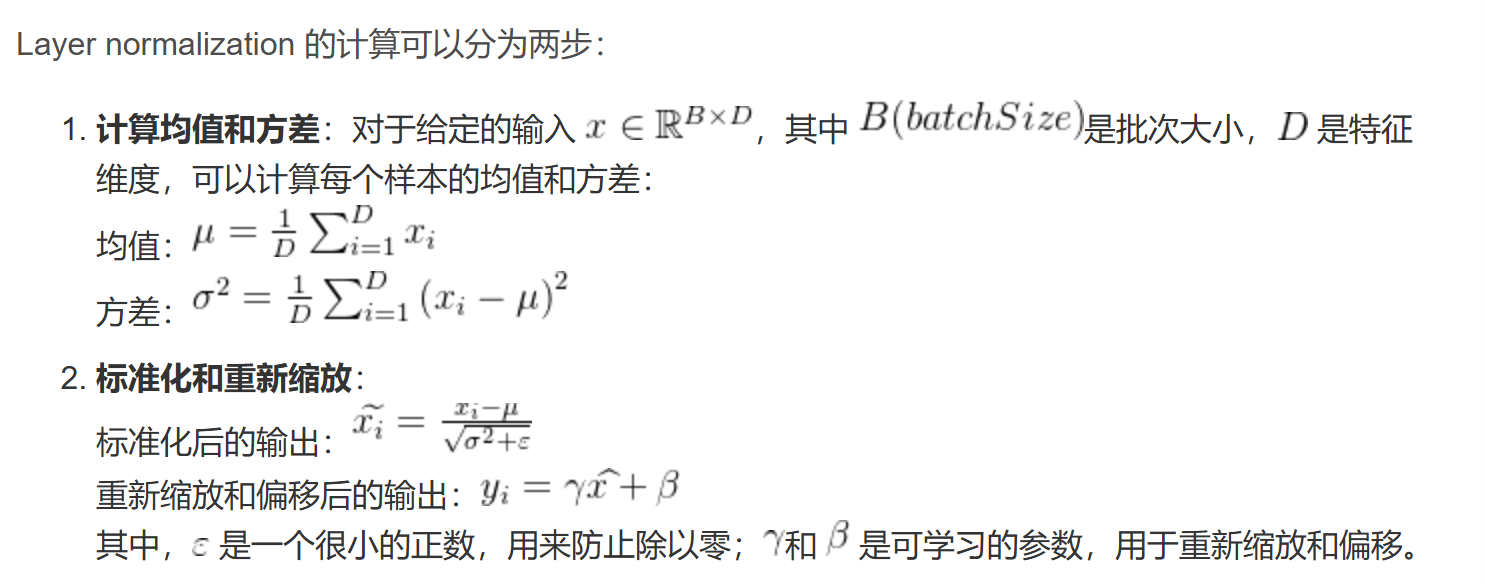

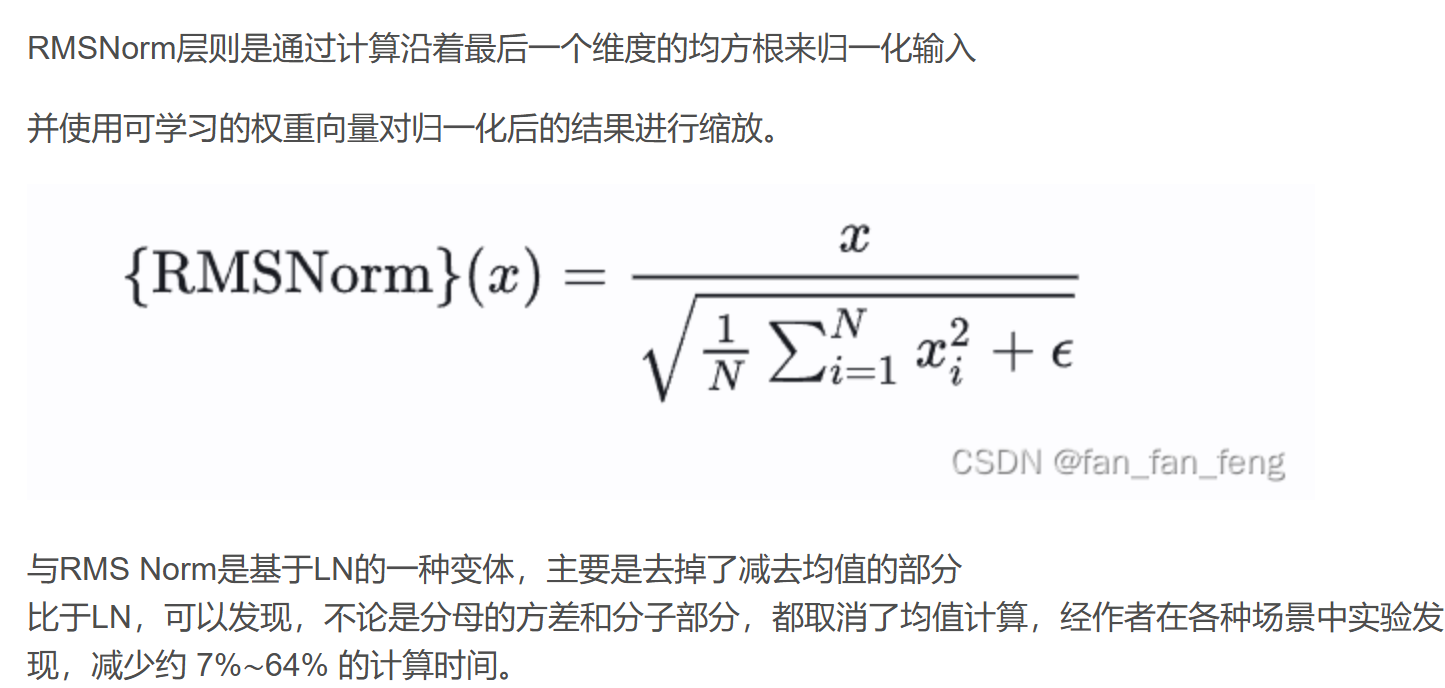

In [ ]:
import torch
import torch.nn as nn

In [2]:
class LayerNorm(nn.Module):
    def __init__(self,num_features,eps=1e-6):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.eps = eps
    
    def forward(self,x):
        mean = x.mean(dim=-1,keepdim =True)
        std = x.std(dim=-1,keepdim=True,unbiased =False)
        normalized_x = (x - mean) / (std + self.eps)
        return self.gamma * normalized_x +self.beta

class RMSNorm(nn.Module):
    def __init__(self,dim:int,eps:float=1e-6):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(dim))
        self.eps = eps
    
    def _norm(self,x):
        return x*torch.rsqrt(x.pow(2).mean(-1,keepdim=True) + self.eps)
    
    def forward(self,x):
        output = self._norm(x.float()).type_as(x)
        return output * self.weight
    
    

In [ ]:
#LayerNorm
if __name__ == '__main__':
    batch_size = 2
    seqlen = 3
    hidden_dim = 4
    
    x = torch.randn(batch_size,seqlen,hidden_dim)
    print(x,"\n")
    
    layer_norm = LayerNorm(num_features=hidden_dim)
    output_tensor = layer_norm(x)
    print(output_tensor,"\n")
    
    torch_layer_norm = torch.nn.LayerNorm(normalized_shape=hidden_dim)
    torch_layer_tensor = torch_layer_norm(x)
    print(torch_layer_tensor,"\n")

In [ ]:
#RMSNorm
if __name__ == '__main__':
    batch_size = 2
    seqlen = 3
    hidden_dim = 4
    
    x = torch.randn(batch_size,seqlen,hidden_dim)
    print(x,"\n")
    
    rmsnorm = RMSNorm(dim = hidden_dim)
    output_tensor = rmsnorm(x)
    print(output_tensor,"\n")
    
    torch_rmsnorm = torch.nn.RMSNorm(normalized_shape = hidden_dim)
    output_torch_tensor = torch_rmsnorm(x)
    print(output_torch_tensor,"\n")